# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

weather_api_key = "4d07827eb7d15f0c6bac33203e222007"
geoapify_key = "f76b71d9aa0c4c4d8e5b01cff5e06c63"

print(weather_api_key)

4d07827eb7d15f0c6bac33203e222007


### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 618


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url =f'https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url =f'&q={city}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(url+city_url).json()
# print(url+'&q=bluff')
# print(json.dumps(city_weather,indent=4))
   
# Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        
#         Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
        

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | barreirinhas
Processing Record 2 of Set 1 | hilo
Processing Record 3 of Set 1 | imeni babushkina
Processing Record 4 of Set 1 | klerksdorp
Processing Record 5 of Set 1 | san patricio
Processing Record 6 of Set 1 | ketchikan
Processing Record 7 of Set 1 | cape town
Processing Record 8 of Set 1 | kirakira
Processing Record 9 of Set 1 | neiafu
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | padang
Processing Record 12 of Set 1 | hermanus
Processing Record 13 of Set 1 | atar
Processing Record 14 of Set 1 | ambon
Processing Record 15 of Set 1 | thompson
Processing Record 16 of Set 1 | ust-kamchatsk
City not found. Skipping...
Processing Record 17 of Set 1 | arraial do cabo
Processing Record 18 of Set 1 | hobart
Processing Record 19 of Set 1 | tando adam
Processing Record 20 of Set 1 | vaini
Processing Record 21 of Set 1 | malanje
Processing Record 22 of Set 1 | chitral
Processi

Processing Record 36 of Set 4 | saint george
Processing Record 37 of Set 4 | verkhoyansk
Processing Record 38 of Set 4 | lompoc
Processing Record 39 of Set 4 | dongsheng
Processing Record 40 of Set 4 | hamilton
Processing Record 41 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 42 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 43 of Set 4 | anage
Processing Record 44 of Set 4 | dunedin
Processing Record 45 of Set 4 | jalu
Processing Record 46 of Set 4 | bathsheba
Processing Record 47 of Set 4 | beringovskiy
Processing Record 48 of Set 4 | pangnirtung
Processing Record 49 of Set 4 | mana
Processing Record 0 of Set 5 | igrim
Processing Record 1 of Set 5 | coahuayana
Processing Record 2 of Set 5 | liuhe
Processing Record 3 of Set 5 | havre-saint-pierre
Processing Record 4 of Set 5 | coihueco
Processing Record 5 of Set 5 | victoria
Processing Record 6 of Set 5 | yenagoa
Processing Record 7 of Set 5 | klaksvik
Processing Record 8 of Set 5 | banda 

Processing Record 26 of Set 8 | vanavara
Processing Record 27 of Set 8 | nipawin
Processing Record 28 of Set 8 | whitehorse
Processing Record 29 of Set 8 | boyolangu
Processing Record 30 of Set 8 | puerto leguizamo
Processing Record 31 of Set 8 | moshenskoye
Processing Record 32 of Set 8 | taywarah
Processing Record 33 of Set 8 | martapura
Processing Record 34 of Set 8 | huescar
Processing Record 35 of Set 8 | uige
Processing Record 36 of Set 8 | varkkallai
Processing Record 37 of Set 8 | homer
Processing Record 38 of Set 8 | catuday
Processing Record 39 of Set 8 | chaozhou
Processing Record 40 of Set 8 | gorontalo
Processing Record 41 of Set 8 | lima
Processing Record 42 of Set 8 | quatre cocos
Processing Record 43 of Set 8 | daru
Processing Record 44 of Set 8 | marawi
Processing Record 45 of Set 8 | kampot
Processing Record 46 of Set 8 | burnie
Processing Record 47 of Set 8 | afmadu
City not found. Skipping...
Processing Record 48 of Set 8 | lorengau
Processing Record 49 of Set 8 | s

Processing Record 19 of Set 12 | deputatskiy
Processing Record 20 of Set 12 | harwich
Processing Record 21 of Set 12 | akyab
Processing Record 22 of Set 12 | quimper
Processing Record 23 of Set 12 | shimoda
Processing Record 24 of Set 12 | pastavy
Processing Record 25 of Set 12 | muriti
Processing Record 26 of Set 12 | chengde
Processing Record 27 of Set 12 | teguise
Processing Record 28 of Set 12 | magnor
Processing Record 29 of Set 12 | amurzet
Processing Record 30 of Set 12 | lucea
Processing Record 31 of Set 12 | isakly
Processing Record 32 of Set 12 | riohacha
Processing Record 33 of Set 12 | nador
Processing Record 34 of Set 12 | cabo san lucas
Processing Record 35 of Set 12 | ballina
Processing Record 36 of Set 12 | concordia
Processing Record 37 of Set 12 | lencois paulista
Processing Record 38 of Set 12 | northam
Processing Record 39 of Set 12 | tres pontas
Processing Record 40 of Set 12 | huangnihe
Processing Record 41 of Set 12 | severouralsk
Processing Record 42 of Set 12 |

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          577
Lat           577
Lng           577
Max Temp      577
Humidity      577
Cloudiness    577
Wind Speed    577
Country       577
Date          577
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,barreirinhas,-2.7469,-42.8264,296.59,96,100,0.34,BR,1680835214
1,hilo,19.7297,-155.0900,296.62,95,100,4.12,US,1680834953
2,imeni babushkina,59.7573,43.1285,267.21,93,6,2.35,RU,1680835214
3,klerksdorp,-26.8521,26.6667,287.47,58,0,1.71,ZA,1680835215
4,san patricio,28.0170,-97.5169,291.07,95,100,5.58,US,1680835215


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,barreirinhas,-2.7469,-42.8264,296.59,96,100,0.34,BR,1680835214
1,hilo,19.7297,-155.0900,296.62,95,100,4.12,US,1680834953
2,imeni babushkina,59.7573,43.1285,267.21,93,6,2.35,RU,1680835214
3,klerksdorp,-26.8521,26.6667,287.47,58,0,1.71,ZA,1680835215
4,san patricio,28.0170,-97.5169,291.07,95,100,5.58,US,1680835215


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

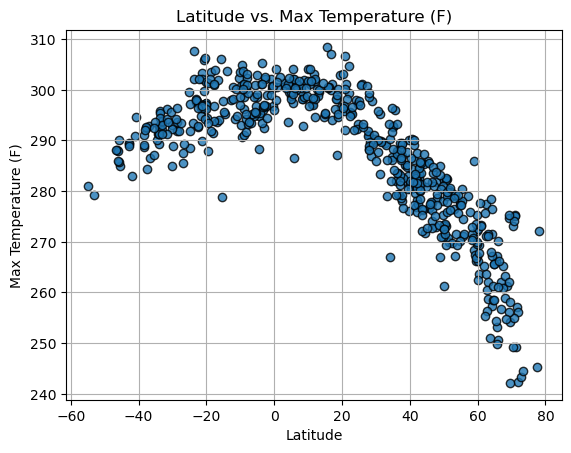

In [9]:
# Build scatter plot for latitude vs. temperature
# Incorporate the other graph properties
date = time.strftime("%m/%d/%Y")
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values, y_values, alpha = 0.8, edgecolor = "black")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f'Latitude vs. Max Temperature (F)')
plt.grid(True)



# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

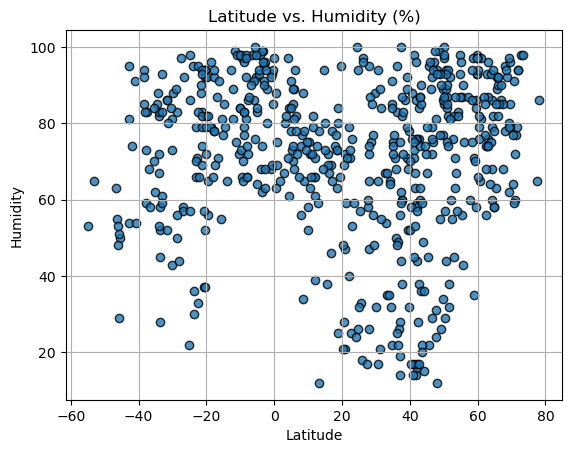

In [10]:
# Build the scatter plots for latitude vs. humidity
# Incorporate the other graph properties
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values, y_values, alpha = 0.8, edgecolors = "k")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title(f'Latitude vs. Humidity (%)')
plt.grid(True)

# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

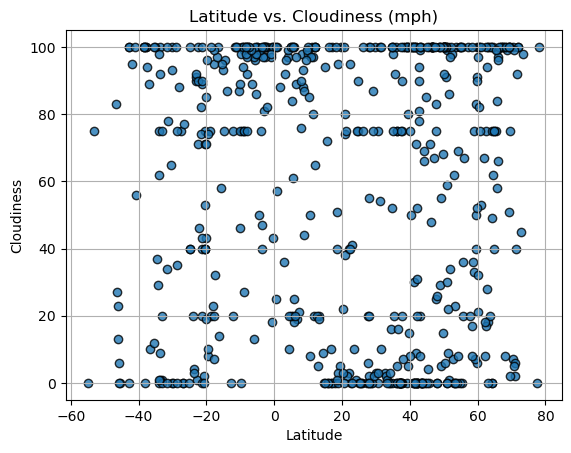

In [11]:
# Build the scatter plots for latitude vs. cloudiness
# Incorporate the other graph properties
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values, y_values, alpha = 0.8, edgecolors = "k")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title(f'Latitude vs. Cloudiness (mph)')
plt.grid(True)

# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

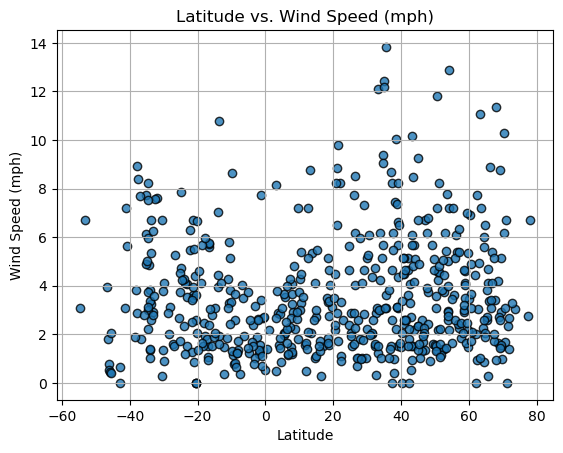

In [59]:
# Build the scatter plots for latitude vs. wind speed
# Incorporate the other graph properties
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values, y_values, alpha = 0.8, edgecolors = "k")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'Latitude vs. Wind Speed (mph)')
plt.grid(True)

# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [17]:
# Define a function to create Linear Regression plots
def get_lin_regress(x_ax_vlus, y_ax_vlus):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_ax_vlus, y_ax_vlus)
    regress_vlus = x_ax_vlus * slope + intercept
    line_eqn = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    r_vlu = rvalue
    
    return regress_vlus, line_eqn, r_vlu

In [18]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,hilo,19.7297,-155.0900,296.62,95,100,4.12,US,1680834953
2,imeni babushkina,59.7573,43.1285,267.21,93,6,2.35,RU,1680835214
4,san patricio,28.0170,-97.5169,291.07,95,100,5.58,US,1680835215
5,ketchikan,55.3422,-131.6461,280.41,87,100,6.17,US,1680835215
12,atar,20.5169,-13.0499,295.84,28,100,2.50,MR,1680835217


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,barreirinhas,-2.7469,-42.8264,296.59,96,100,0.34,BR,1680835214
3,klerksdorp,-26.8521,26.6667,287.47,58,0,1.71,ZA,1680835215
6,cape town,-33.9258,18.4232,292.80,72,75,2.24,ZA,1680834882
7,kirakira,-10.4544,161.9205,302.25,72,87,2.04,SB,1680835215
8,neiafu,-18.6500,-173.9833,303.53,79,20,4.12,TO,1680835216


###  Temperature vs. Latitude Linear Regression Plot

The rvalue is: -0.8745762250923107


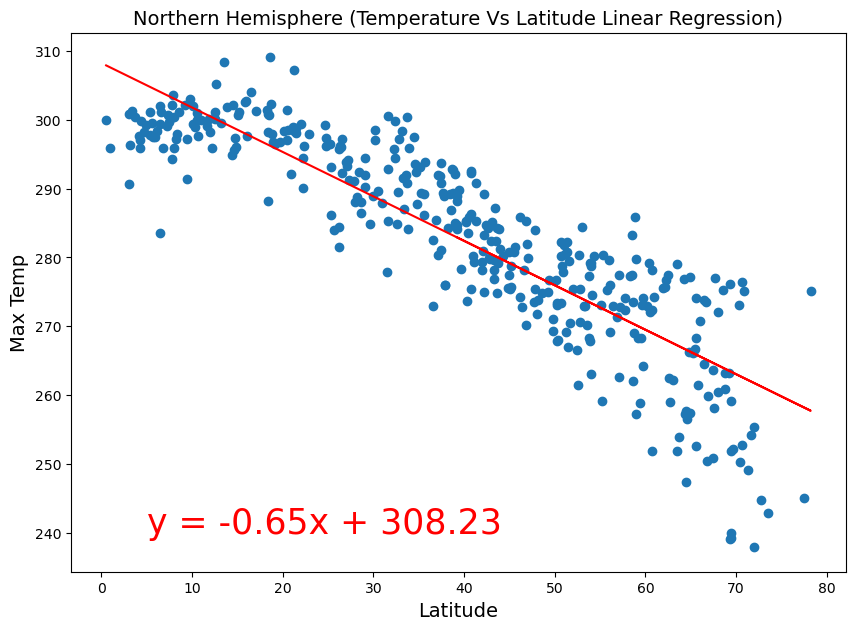

In [54]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
regress_values, line_equation, r_value = get_lin_regress(x_values, y_values)

plt.figure(figsize=(10, 7))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_equation,(5,240),fontsize=25,color="red")
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Max Temp', fontsize=14)
plt.title("Northern Hemisphere (Temperature Vs Latitude Linear Regression)", fontsize=14)

print(f"The rvalue is: {r_value}")
plt.show()

The rvalue is: 0.6441282307972459


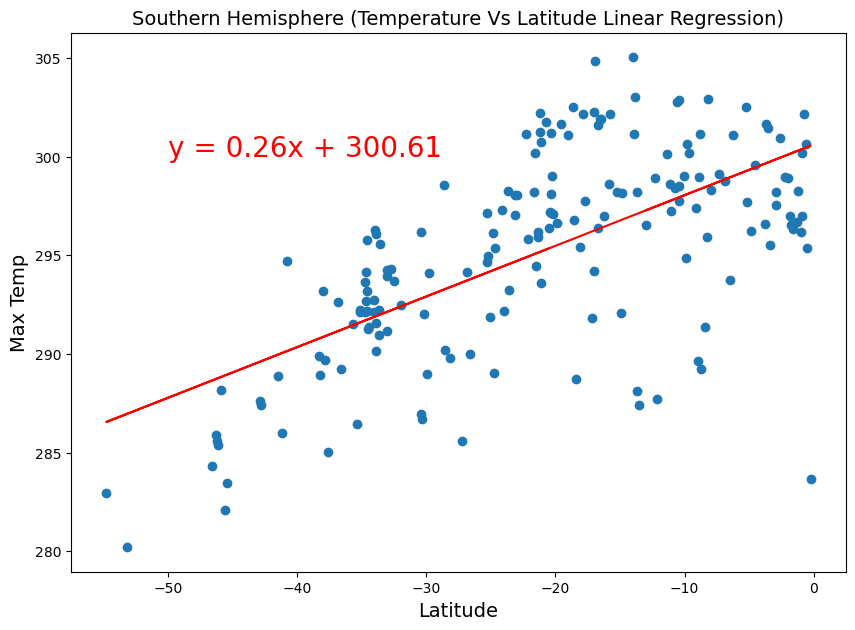

In [53]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
regress_values, line_equation, r_value = get_lin_regress(x_values, y_values)

plt.figure(figsize=(10, 7))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_equation,(-50,300),fontsize=20,color="red")
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Max Temp', fontsize=14)
plt.title("Southern Hemisphere (Temperature Vs Latitude Linear Regression)", fontsize=14)

print(f"The rvalue is: {r_value}")
plt.show()

### Humidity vs. Latitude Linear Regression Plot

The rvalue is: 0.23557438530826255


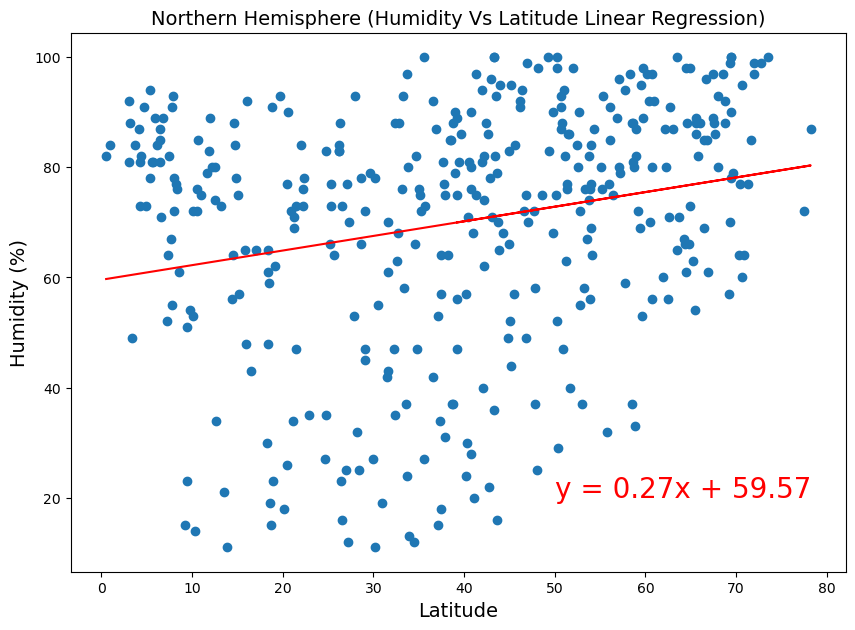

In [44]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
regress_values, line_equation, r_value = get_lin_regress(x_values, y_values)

plt.figure(figsize=(10, 7))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_equation,(50,20),fontsize=20,color="red")
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Humidity (%)', fontsize=14)
plt.title("Northern Hemisphere (Humidity Vs Latitude Linear Regression)", fontsize=14)

print(f"The rvalue is: {r_value}")
plt.show()

The rvalue is: 0.42032227988307574


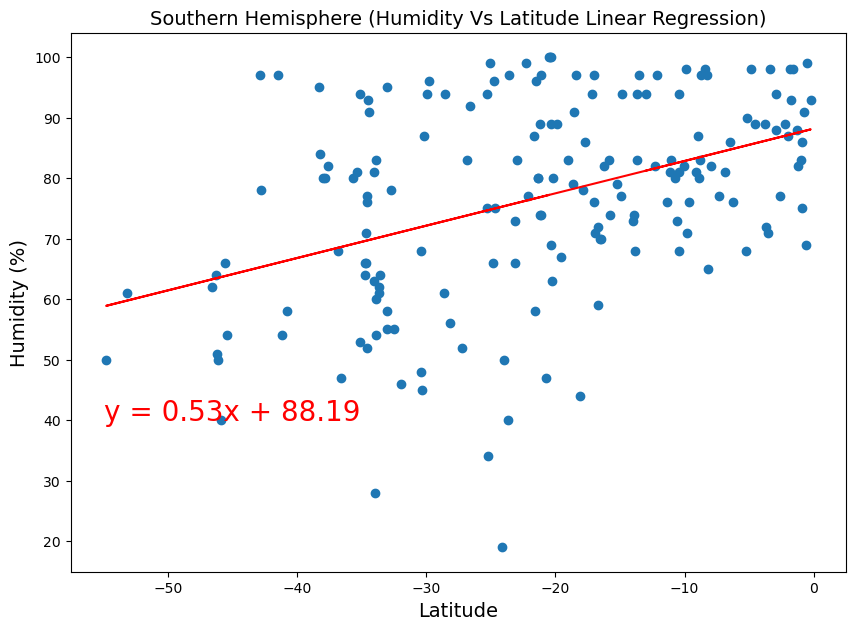

In [51]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
regress_values, line_equation, r_value = get_lin_regress(x_values, y_values)

plt.figure(figsize=(10, 7))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_equation,(-55,40),fontsize=20,color="red")
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Humidity (%)', fontsize=14)
plt.title("Southern Hemisphere (Humidity Vs Latitude Linear Regression)", fontsize=14)

print(f"The rvalue is: {r_value}")
plt.show()

### Cloudiness vs. Latitude Linear Regression Plot

The rvalue is: 0.12054155663967296


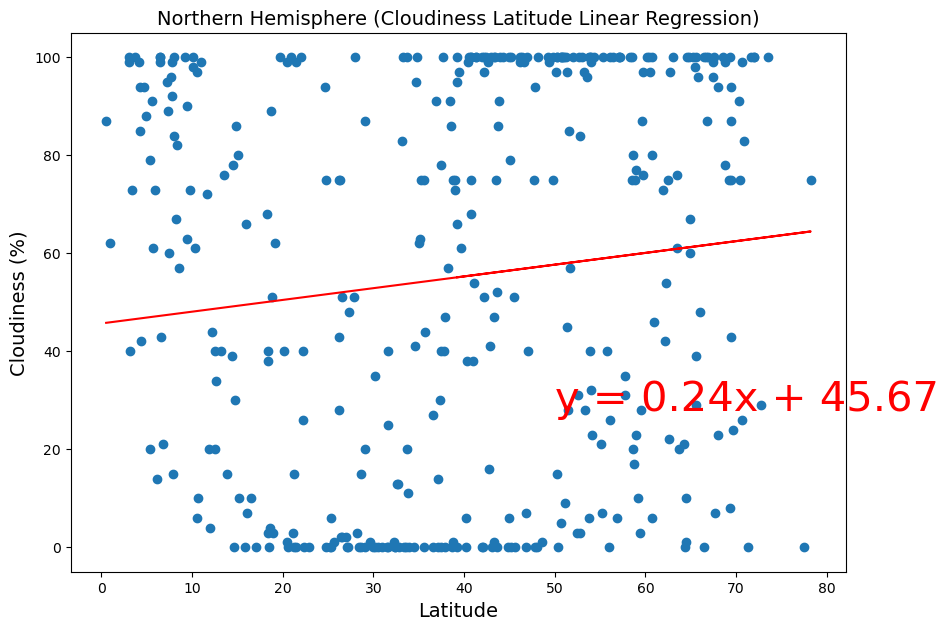

In [55]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
regress_values, line_equation, r_value = get_lin_regress(x_values, y_values)

plt.figure(figsize=(10, 7))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_equation,(50,28),fontsize=30,color="red")
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Cloudiness (%)', fontsize=14)
plt.title("Northern Hemisphere (Cloudiness Latitude Linear Regression)", fontsize=14)

print(f"The rvalue is: {r_value}")
plt.show()

The rvalue is: 0.3002357041767862


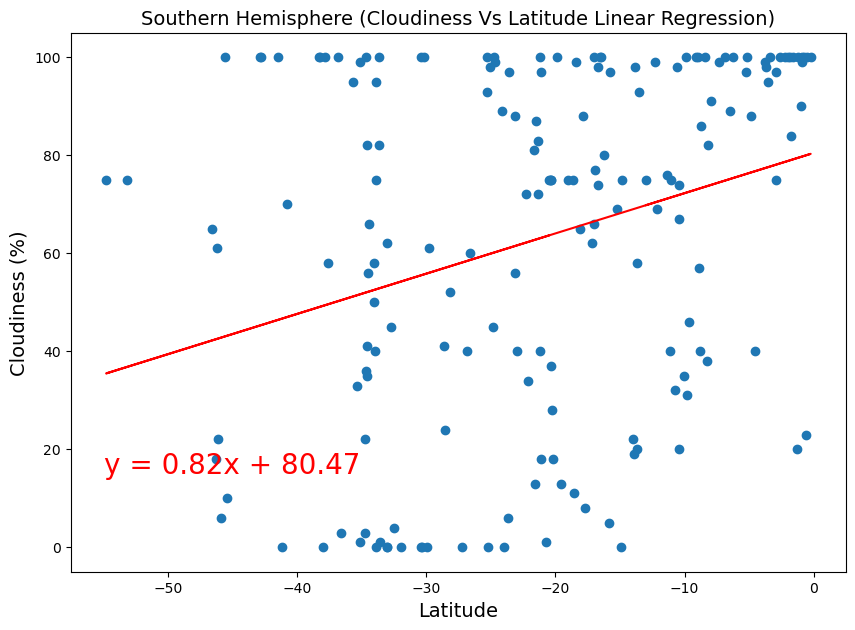

In [47]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
regress_values, line_equation, r_value = get_lin_regress(x_values, y_values)

plt.figure(figsize=(10, 7))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_equation,(-55,15),fontsize=20,color="red")
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Cloudiness (%)', fontsize=14)
plt.title("Southern Hemisphere (Cloudiness Vs Latitude Linear Regression)", fontsize=14)

print(f"The rvalue is: {r_value}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The rvalue is: 0.10245242861428776


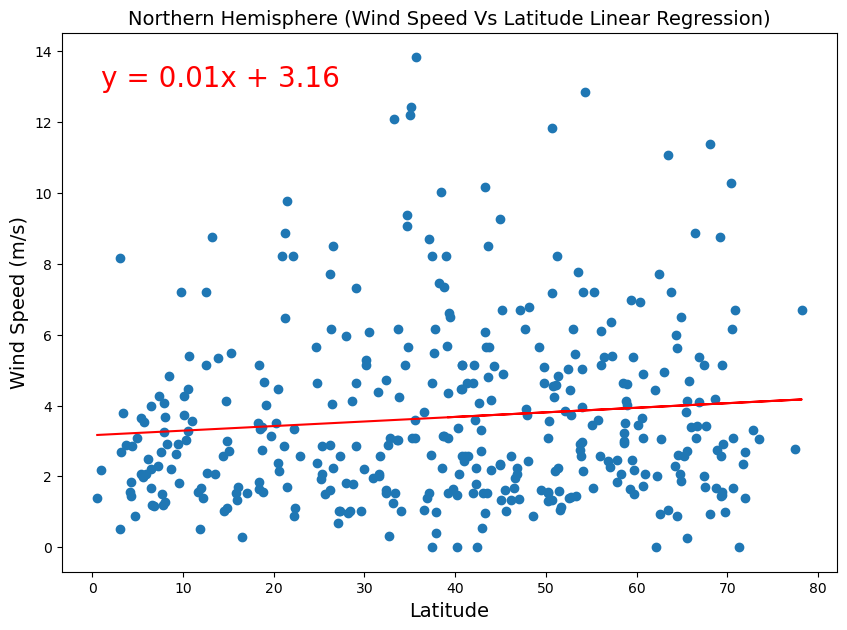

In [48]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
regress_values, line_equation, r_value = get_lin_regress(x_values, y_values)

plt.figure(figsize=(10, 7))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_equation,(1,13),fontsize=20,color="red")
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Wind Speed (m/s)', fontsize=14)
plt.title("Northern Hemisphere (Wind Speed Vs Latitude Linear Regression)", fontsize=14)

print(f"The rvalue is: {r_value}")
plt.show()

The rvalue is: -0.31674815790655425


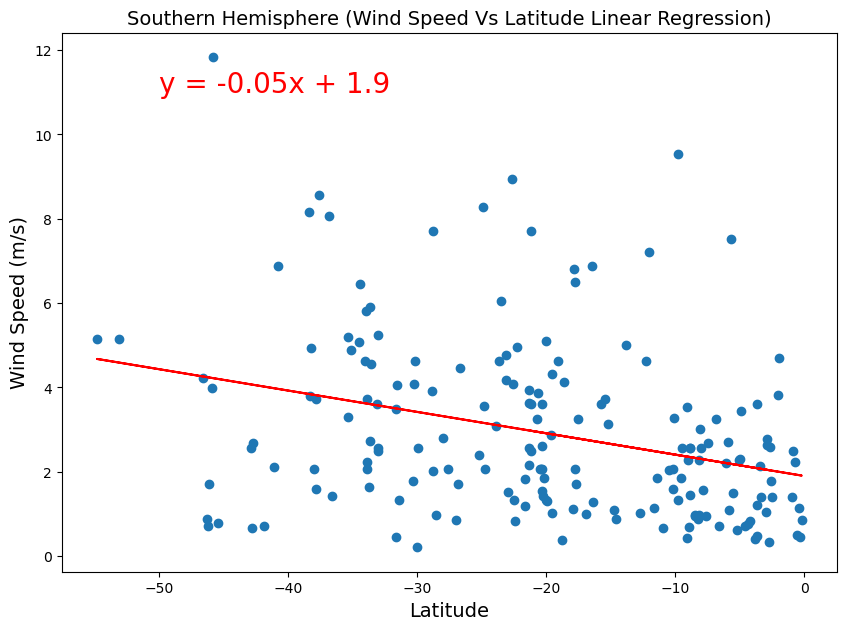

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
regress_values, line_equation, r_value = get_lin_regress(x_values, y_values)

plt.figure(figsize=(10, 7))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_equation,(-50,11),fontsize=20,color="red")
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Wind Speed (m/s)', fontsize=14)
plt.title("Southern Hemisphere (Wind Speed Vs Latitude Linear Regression)", fontsize=14)

print(f"The rvalue is: {r_value}")
plt.show()